# Neural Networks: A closer look at the ReLU activation Function

Activation functions play a fundamental role in neural networks by introducing non-linearity to the model. They serve as decision-making tools, determining whether a neuron should be activated or not based on the input it receives. This non-linear transformation is crucial for enabling neural networks to learn complex patterns and relationships within data, ultimately enhancing their predictive power and performance.

The introduction of non-linearity through activation functions is crucial for enabling neural networks to model complex, non-linear relationships in data. Without non-linear activation functions, neural networks would be limited to representing linear transformations of the input data, severely restricting their expressive power and ability to capture real-world phenomena. By introducing non-linearity, activation functions enable neural networks to approximate highly non-linear functions, making them powerful tools for tasks such as image recognition, natural language processing, and predictive analytics.

Neural networks create complex features (feature extraction) based on patterns in the data until it reaches the output layer. When it comes time to make a prediction, the output layer linearly combines these features to make a prediction. This is where the activation functions come in. They introduce non-linearity to the model, allowing it to learn complex patterns and relationships in the data. But how does the ReLU activation function achieve this? It turns out that the output layer can also be thought of as a combination of simple non-linear functions, which are then combined linearly to make a prediction. This is where the ReLU activation function comes in. We project our data onto the prediction space, and then apply the ReLU activation function to introduce non-linearity. This allows the model to learn patterns and relationships in the data that would be impossible to capture with a linear model.

# Characteristics of good activation functions
* Zero-centered: This means that the activation function should have an average output of zero, which helps speed up the convergence of the optimization algorithm.
* Non-linear: The activation function should introduce non-linearity to the model, allowing it to learn complex patterns and relationships in the data.
* Differentiable: The activation function should be differentiable, meaning that its derivative can be computed at any point. This is necessary for training the model using gradient-based optimization algorithms such as backpropagation.
* Monotonic: The activation function should be monotonic, meaning that its output should increase or decrease with the input. This helps ensure that the model is learning the correct patterns in the data.
* Smooth: The activation function should be smooth, meaning that it should have a continuous derivative. This helps ensure that the optimization algorithm can converge to a good solution.
* Computationally efficient: The activation function should be computationally efficient to compute, allowing the model to make predictions quickly and efficiently.

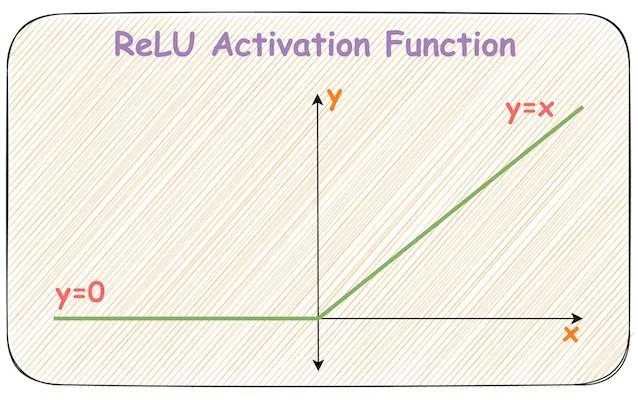

References:

[What Makes ReLU a Non-linear Activation Function](https://blog.dailydoseofds.com/p/a-visual-and-intuitive-guide-to-what)

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Universal Function Approximation

The Universal Function Approximation Theorem states that a neural network with a single hidden layer can approximate any continuous function as long as it has enough hidden nodes and that we have the right weights and biases.

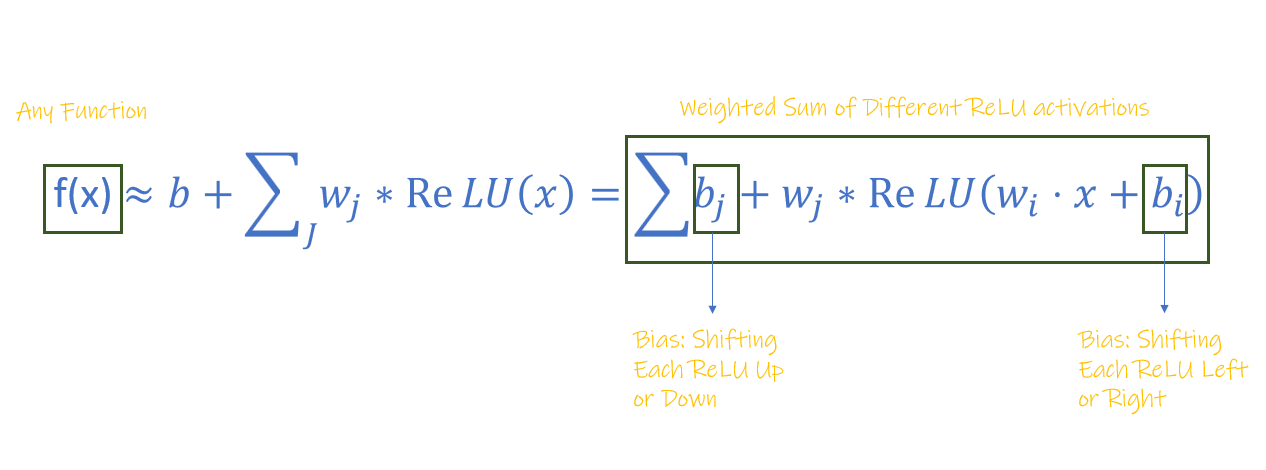

One way to think of neural networks is that they are a series of transformations that map the input to the output. Each layer before the output layer can be thought of as a feature extractor, transforming the input into a new representation that captures the patterns and relationships in the data. The output layer then combines these features to make a prediction.

When we use ReLU, the number of hidden node activations will determine the network capacity. We're essentially modeling the underlying function that produced our data with linear segments separated by sharp changes in slope. A neural network with D, activations (nodes) will have D joints and D+1 linear regions. Fun fact, the bias of the output layer shifts the activation right or left. As we add more activations, they'll represent smaller sections of the function. This characteristic of ReLU allows neural networks to approximate complex functions, efficiently breaking them down into simpler linear parts.


# Let see it in code:

ReLU gives is the typical piecewise function that is linear for x > 0 and 0 for x < 0.

We can shift the activations right or left by adding a bias term to the inside of the ReLU function.

We can shift the activations up or down by adding a bias term to the outside of the ReLU function.

In [2]:
# Define the ReLU activation function
def relu(x):
    return torch.max(torch.tensor(0.0), x)

In [3]:
x = torch.arange(-10, 11, 1)
shift = 2.0 # shift function to left by 2, up by 2
w = torch.ones(x.size())
b = torch.zeros(x.size())

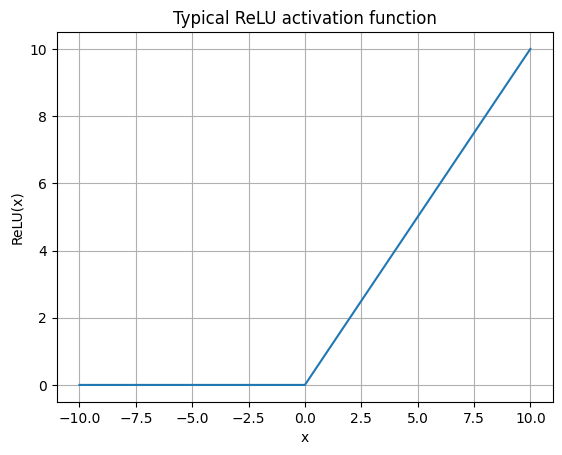

In [4]:
output = relu(w * x + b)

plt.plot(x, output)
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('Typical ReLU activation function')
plt.grid()
plt.show()

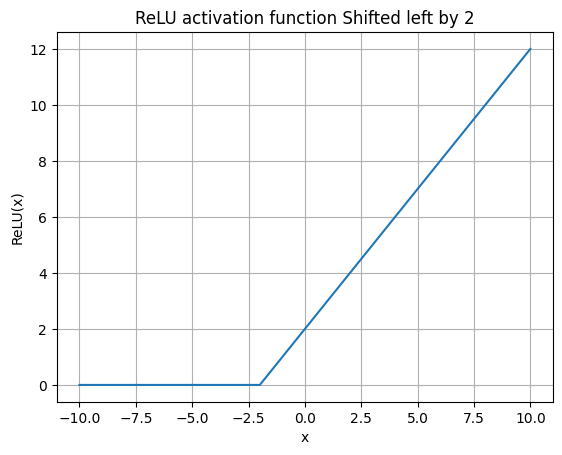

In [5]:
output = relu(w * x + b + shift)

plt.plot(x, output)
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('ReLU activation function Shifted left by 2')
plt.grid()
plt.show()

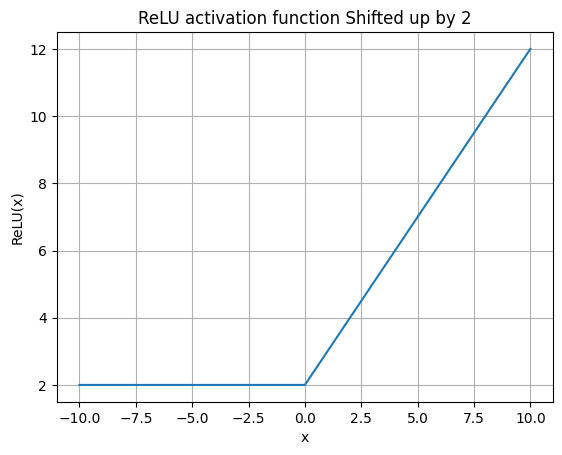

In [6]:
output = relu(w * x + b) + 2

plt.plot(x, output)
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('ReLU activation function Shifted up by 2')
plt.grid()
plt.show()

# Understanding final Hidden Layer

We mentioned that all layers before the final layer are feature engineering. The final output can be thought of a sequence of ReLU functions that are shifted to the right by the value of the bias term to approximate the function that maps the input to the output.

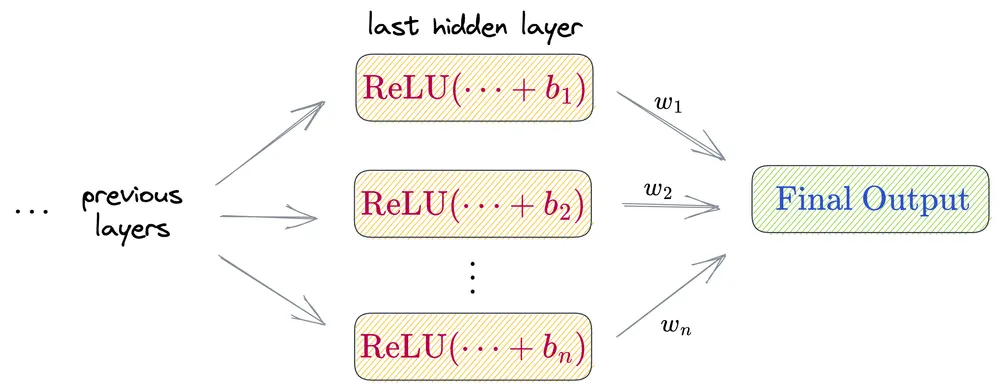

As we add more neurons to the last hidden layer, we are adding more ReLU functions that are shifted to the right by the value of the bias term. This allows the model to approximate more complex functions. We see below that the more neurons we add, more ability the model has to approximate curves.

In [7]:
w_hidden_state = torch.tensor([1.0, 1.0, -3.0])
b_hidden_state = torch.tensor([0.0, -2.0, -3.0])

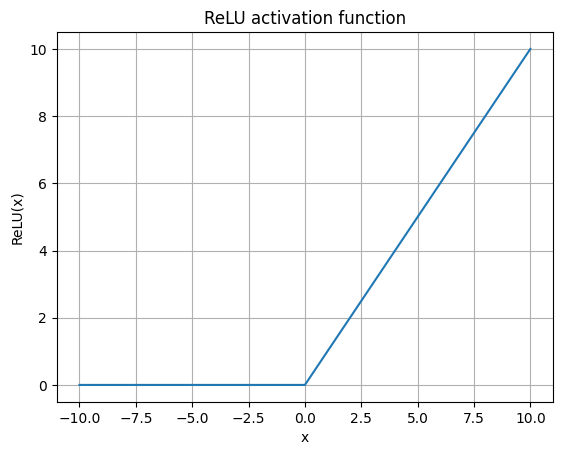

In [8]:
output1 = (
    w_hidden_state[0] * relu(x + b_hidden_state[0])
)
plt.plot(x, output1)
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('ReLU activation function')
plt.grid()
plt.show()

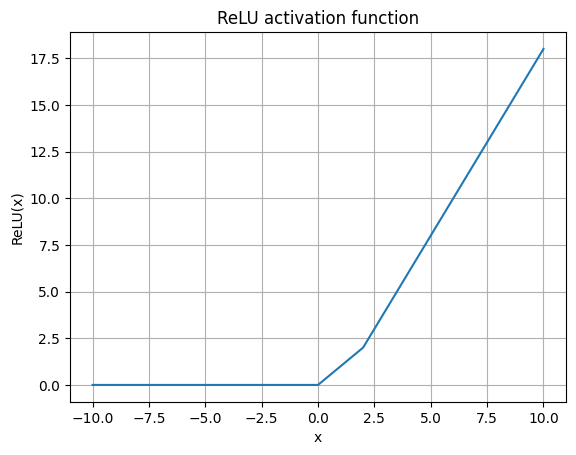

In [9]:
output2 = (
    w_hidden_state[0] * relu(x + b_hidden_state[0]) + 
    w_hidden_state[1] * relu( x + b_hidden_state[1])
)
plt.plot(x, output2)
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('ReLU activation function')
plt.grid()
plt.show()

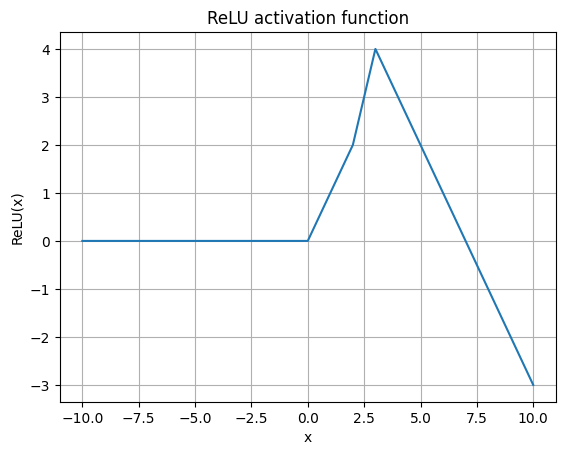

In [10]:
output3 = (
    w_hidden_state[0] * relu(x + b_hidden_state[0]) + 
    w_hidden_state[1] * relu(x + b_hidden_state[1]) + 
    w_hidden_state[2] * relu(x + b_hidden_state[2])
)
plt.plot(x, output3)
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('ReLU activation function')
plt.grid()
plt.show()

# Function Modeling

Let's consider modeling a simple function f(x) = x² using a neural network with ReLU activation functions.

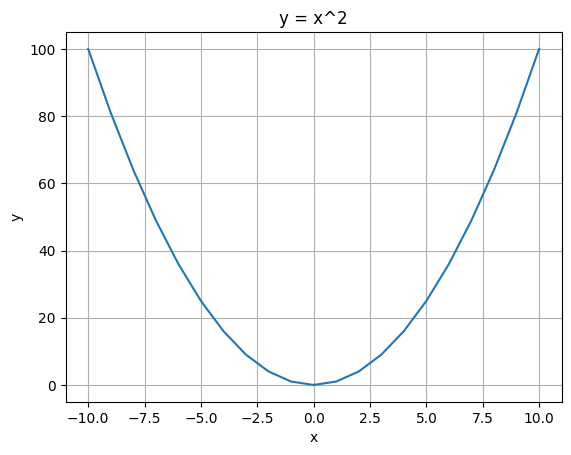

In [11]:
y = x ** 2

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x^2')
plt.grid()
plt.show()

In [12]:
w_hidden_state = torch.tensor([2.8, -2.1, 2.0, -2.2])
b_hidden_state = torch.tensor([-2.85, -3.09, -5.63, -4.58])

w_inference = torch.tensor([1.9, 2.3, 3.1, 2.5])
b_inference = torch.tensor([-1.0])

## One ReLU neuron

We see that by using a single ReLU neuron, we get the typical ReLU function, shifted to the right by the bias_inference term and scaled by the weight_inference term.

Overall this sucks at approximating the function f(x) = x².

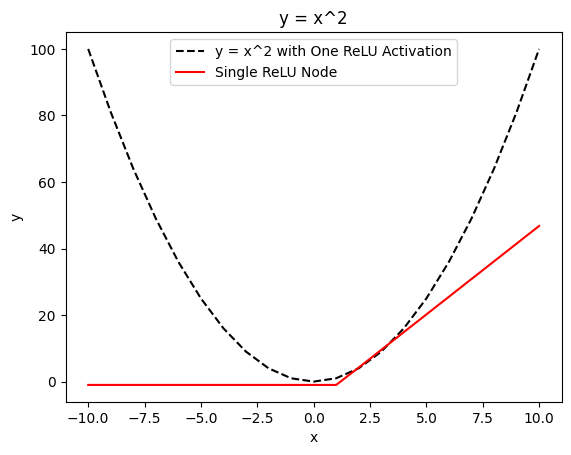

In [13]:
output_inference1 = (
    w_inference[0] * relu(w_hidden_state[0] * x + b_hidden_state[0])
) + b_inference

plt.plot(x, y, label='y = x^2 with One ReLU Activation', color='black', linestyle='--')
plt.plot(x, output_inference1, label='Single ReLU Node', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x^2')
plt.legend()

# Two ReLU neurons

When we add a second ReLU Neuron to the model, we are allowed to as inflection points to the original ReLU curve. This allows us to approximate the function f(x) = x² better.

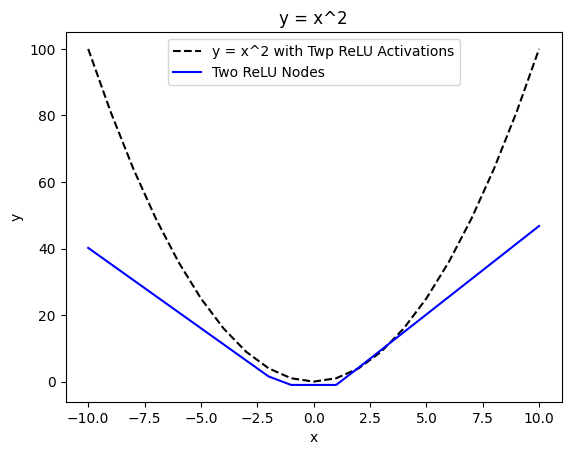

In [14]:
output_inference2 = (
    w_inference[0] * relu(w_hidden_state[0] * x + b_hidden_state[0]) +
    w_inference[1] * relu(w_hidden_state[1] * x  + b_hidden_state[1])
) + b_inference

plt.plot(x, y, label='y = x^2 with Twp ReLU Activations', color='black', linestyle='--')
plt.plot(x, output_inference2, label='Two ReLU Nodes', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x^2')
plt.legend()
plt.show()

# Three ReLU neurons

When we add a third ReLU Neuron to the model, we add an additional inflection point to the original ReLU curve. This allows us to approximate the function f(x) = x² even better on the right side of the curve.

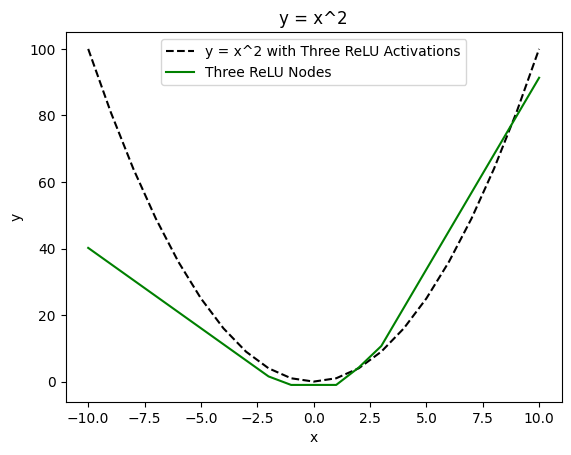

In [15]:
output_inference3 = (
    w_inference[0] * relu(w_hidden_state[0] * x + b_hidden_state[0]) +
    w_inference[1] * relu(w_hidden_state[1] * x  + b_hidden_state[1]) +
    w_inference[2] * relu(w_hidden_state[2] * x  + b_hidden_state[2])
) + b_inference

plt.plot(x, y, label='y = x^2 with Three ReLU Activations', color='black', linestyle='--')
plt.plot(x, output_inference3, label='Three ReLU Nodes', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x^2')
plt.legend()
plt.show()

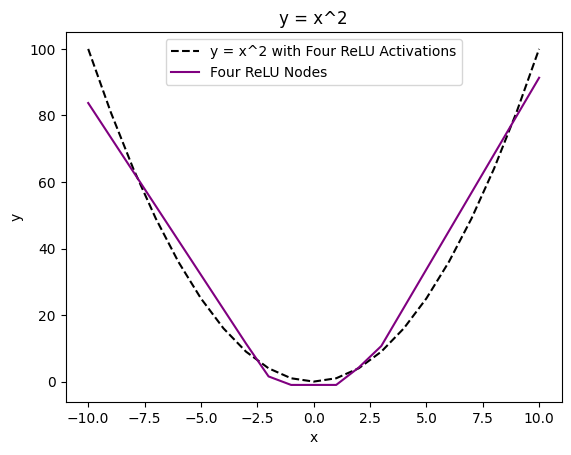

In [16]:
output_inference4 = (
    w_inference[0] * relu(w_hidden_state[0] * x + b_hidden_state[0]) +
    w_inference[1] * relu(w_hidden_state[1] * x  + b_hidden_state[1]) +
    w_inference[2] * relu(w_hidden_state[2] * x  + b_hidden_state[2]) +
    w_inference[3] * relu(w_hidden_state[3] * x  + b_hidden_state[3])
) + b_inference

plt.plot(x, y, label='y = x^2 with Four ReLU Activations', color='black', linestyle='--')
plt.plot(x, output_inference4, label='Four ReLU Nodes', color='purple')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x^2')
plt.legend()
plt.show()

# Let's see the progression in a single plot

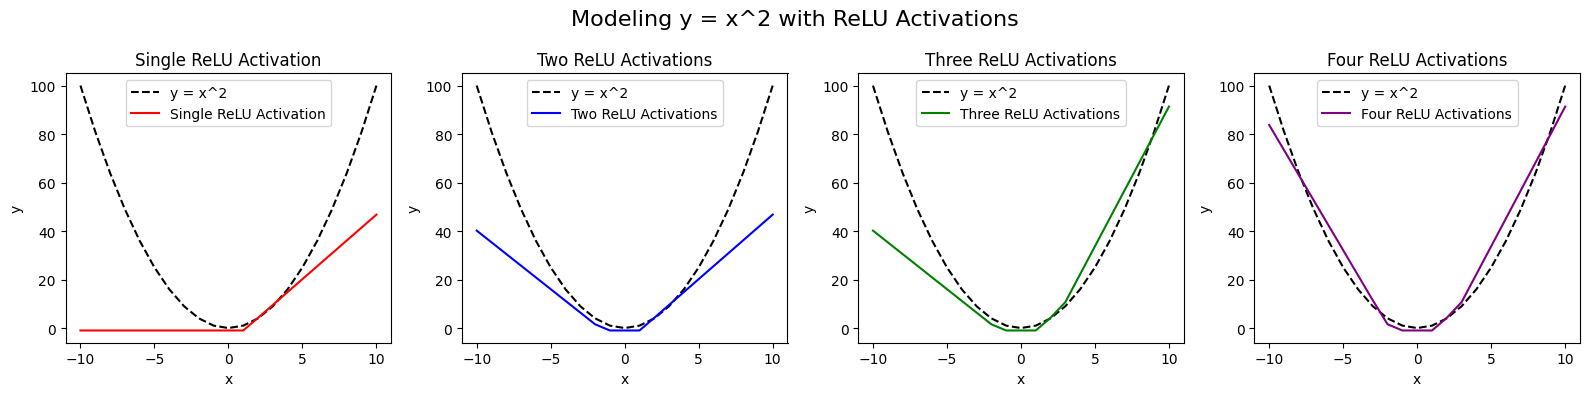

In [17]:
outputs = [output_inference1, output_inference2, output_inference3, output_inference4]
titles = ['Single ReLU Activation', 'Two ReLU Activations', 'Three ReLU Activations', 'Four ReLU Activations']
colors = ['red', 'blue', 'green', 'purple']

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

# Plot each function on a separate subplot
for ax, output, title, color in zip(axs, outputs, titles, colors):
    ax.plot(x, y, label='y = x^2', color='black', linestyle='--')
    ax.plot(x, output, label=title, color=color)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(title)
    ax.legend()

plt.suptitle('Modeling y = x^2 with ReLU Activations', fontsize=16)
plt.tight_layout()
plt.show()

# Now let's do it with a neural network

Let's overfit a neural network to the function f(x) = x² using ReLU activation functions. This will give us a really good approximation within the range of the training data.

### Helper functions

In [18]:
class Silu(nn.Module):
    def __init__(self, beta=1.0):
        super().__init__()
        self.beta = beta

    def forward(self, x):
        return x * torch.sigmoid(self.beta*x)

In [19]:
class SwiGLU(nn.Module):
    def __init__(self, in_size):
        super().__init__()
        self.projection = nn.Linear(in_size, in_size)
        self.gate = nn.Linear(in_size, in_size)
        self.swish = Silu(beta=1.0)

    def forward(self, x):
        # Swishβ(xW + b)
        gate_output = self.swish(self.gate(x))
        # xV + c
        projection_output = self.projection(x)
        # xV + c * Swishβ(xW + b)
        return gate_output * projection_output

In [20]:
def get_activations(model: nn.Module, x: torch.Tensor, activation_function = 'relu', n_activations: int = 1) -> torch.Tensor:
    # Set model to evaluation mode
    model.eval()
    
    linear1_weight = model[0].weight.squeeze(1).detach()
    linear1_bias = model[0].bias.detach()
    linear2_weight = model[2].weight.squeeze(0).detach()
    linear2_bias = model[2].bias.detach()

    activations = torch.zeros(n_activations, x.size(0))
    if activation_function == 'relu':
        for i in range(n_activations):
            input = linear1_weight[i] * x + linear1_bias[i]
            activations[i] = linear2_weight[i] * F.relu(input)
    elif activation_function == 'swiglu':
        for i in range(n_activations):
            input = linear1_weight[i] * x + linear1_bias[i]
            activations[i] = linear2_weight[i] * model[1](input.unsqueeze(1)).squeeze(1)
    activations = activations.sum(axis=0) + linear2_bias

    return activations.detach()

# Modeling

In [21]:
x = torch.arange(-10, 11, 1).float()
y = x ** 2

In [22]:
hidden_dim = 64
output_dim = 1

model = nn.Sequential(
    nn.Linear(1, hidden_dim),
    nn.ReLU(),
    nn.Linear(hidden_dim, output_dim)
)
epochs = 1000
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [23]:
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(x.unsqueeze(1))
    loss = criterion(output, y.unsqueeze(1))
    loss.backward()
    optimizer.step()

In [24]:
y_hat = model(x.unsqueeze(1))

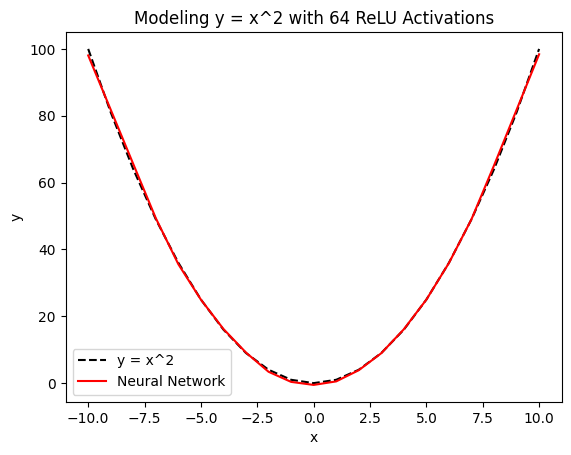

In [25]:
plt.plot(x, y, label='y = x^2', color='black', linestyle='--')
plt.plot(x, y_hat.detach().numpy(), label='Neural Network', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Modeling y = x^2 with {hidden_dim} ReLU Activations')
plt.legend()
plt.show()

In [26]:
linear1_weight = model[0].weight.detach().numpy()
linear1_bias = model[0].bias.detach().numpy()

linear2_weight = model[2].weight.detach().numpy()
linear2_bias = model[2].bias.detach().numpy()

# print weights and biases
print('Linear 1 weights:', linear1_weight.shape)
print('Linear 1 bias:', linear1_bias.shape)
# print weights and biases
print('Linear 2 weights:', linear2_weight.shape)
print('Linear 2 bias:', linear2_bias.shape)

Linear 1 weights: (64, 1)
Linear 1 bias: (64,)
Linear 2 weights: (1, 64)
Linear 2 bias: (1,)


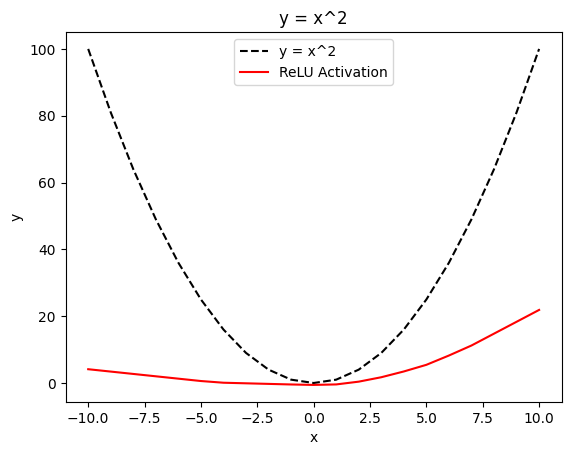

In [27]:
activations = get_activations(model, x, activation_function='relu', n_activations=10)

# plot the activations
plt.plot(x, y, label='y = x^2', color='black', linestyle='--')
plt.plot(x, activations, label='ReLU Activation', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x^2')
plt.legend()
plt.show()

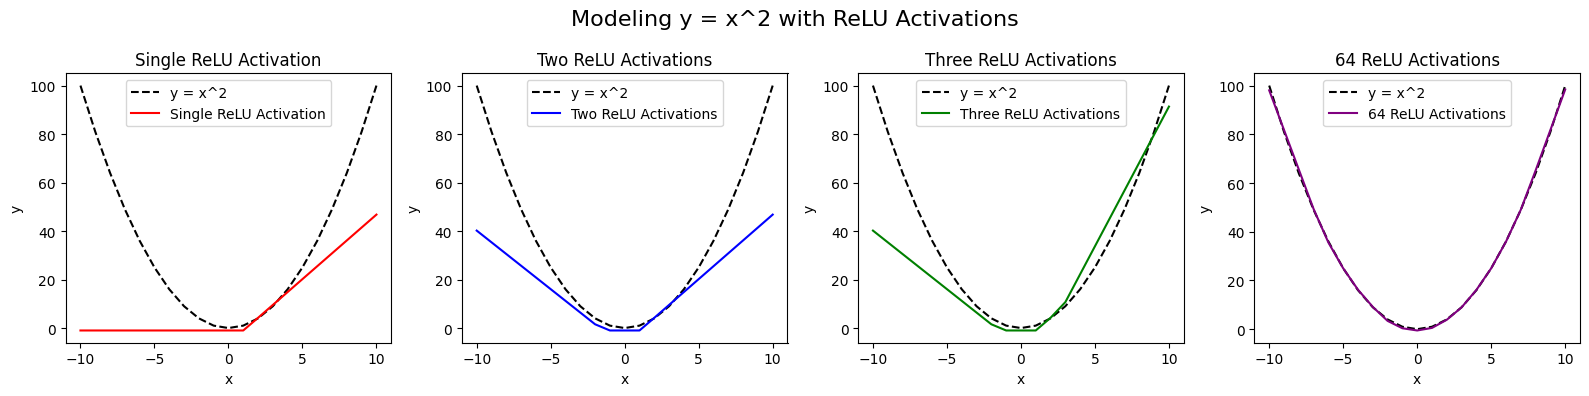

In [28]:
# Appending the ReLU activation function to subplot
outputs = [output_inference1, output_inference2, output_inference3, y_hat.detach().numpy()]
titles = ['Single ReLU Activation', 'Two ReLU Activations', 'Three ReLU Activations', f'{hidden_dim} ReLU Activations']
colors = ['red', 'blue', 'green', 'purple']

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

# Plot each function on a separate subplot
for ax, output, title, color in zip(axs, outputs, titles, colors):
    ax.plot(x, y, label='y = x^2', color='black', linestyle='--')
    ax.plot(x, output, label=title, color=color)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(title)
    ax.legend()

plt.suptitle('Modeling y = x^2 with ReLU Activations', fontsize=16)
plt.tight_layout()
plt.show()

# Lets look at the model capacity with SwiGLU

In [29]:
epochs_swiglu = 1000
learning_rate_swiglu = 0.01
criterion_swiglu = nn.MSELoss()
output_dim_swiglu = 1

In [30]:
hidden_dim_swiglu1 = 1

model_swiglu1 = nn.Sequential(
    nn.Linear(1, hidden_dim_swiglu1),
    SwiGLU(hidden_dim_swiglu1),
    nn.Linear(hidden_dim_swiglu1, output_dim_swiglu)
)
optimizer_swiglu1 = optim.Adam(model_swiglu1.parameters(), lr=learning_rate_swiglu)

In [31]:
for epoch in range(epochs_swiglu):
    optimizer_swiglu1.zero_grad()
    output_swiglu = model_swiglu1(x.unsqueeze(1))
    loss_swiglu1 = criterion(output_swiglu, y.unsqueeze(1))
    loss_swiglu1.backward()
    optimizer_swiglu1.step()

In [32]:
y_hat_swiglu1 = model_swiglu1(x.unsqueeze(1))

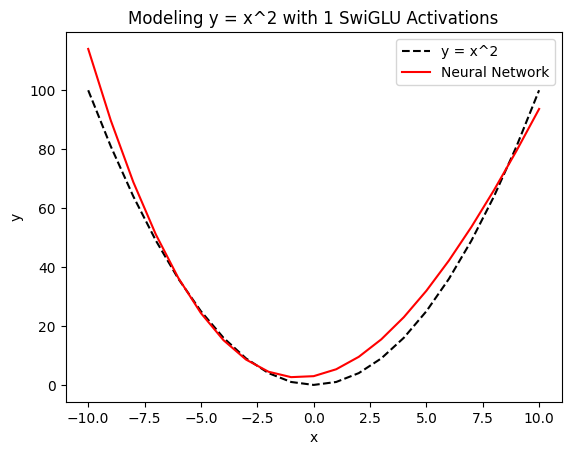

In [33]:
plt.plot(x, y, label='y = x^2', color='black', linestyle='--')
plt.plot(x, y_hat_swiglu1.detach().numpy(), label='Neural Network', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Modeling y = x^2 with {hidden_dim_swiglu1} SwiGLU Activations')
plt.legend()
plt.show()

# Let's train 4 seperate swiglu models with 1, 2, 3, and 4 neurons in the last hidden layer and compare the results.

In [34]:
hidden_dim_swiglu2 = 2

model_swiglu2 = nn.Sequential(
    nn.Linear(1, hidden_dim_swiglu2),
    SwiGLU(hidden_dim_swiglu2),
    nn.Linear(hidden_dim_swiglu2, output_dim_swiglu)
)
optimizer_swiglu2 = optim.Adam(model_swiglu2.parameters(), lr=learning_rate_swiglu)

for epoch in range(epochs_swiglu):
    optimizer_swiglu2.zero_grad()
    output_swiglu = model_swiglu2(x.unsqueeze(1))
    loss_swiglu2 = criterion(output_swiglu, y.unsqueeze(1))
    loss_swiglu2.backward()
    optimizer_swiglu2.step()

y_hat_swiglu2 = model_swiglu2(x.unsqueeze(1))

In [35]:
hidden_dim_swiglu3 = 3

model_swiglu3 = nn.Sequential(
    nn.Linear(1, hidden_dim_swiglu3),
    SwiGLU(hidden_dim_swiglu3),
    nn.Linear(hidden_dim_swiglu3, output_dim_swiglu)
)
optimizer_swiglu3 = optim.Adam(model_swiglu3.parameters(), lr=learning_rate_swiglu)

for epoch in range(epochs_swiglu):
    optimizer_swiglu3.zero_grad()
    output_swiglu = model_swiglu3(x.unsqueeze(1))
    loss_swiglu3 = criterion(output_swiglu, y.unsqueeze(1))
    loss_swiglu3.backward()
    optimizer_swiglu3.step()

y_hat_swiglu3 = model_swiglu3(x.unsqueeze(1))

In [36]:
hidden_dim_swiglu4 = 2

model_swiglu4 = nn.Sequential(
    nn.Linear(1, hidden_dim_swiglu4),
    SwiGLU(hidden_dim_swiglu4),
    nn.Linear(hidden_dim_swiglu4, output_dim_swiglu)
)
optimizer_swiglu4 = optim.Adam(model_swiglu4.parameters(), lr=learning_rate_swiglu)

for epoch in range(epochs_swiglu):
    optimizer_swiglu4.zero_grad()
    output_swiglu = model_swiglu4(x.unsqueeze(1))
    loss_swiglu4 = criterion(output_swiglu, y.unsqueeze(1))
    loss_swiglu4.backward()
    optimizer_swiglu4.step()

y_hat_swiglu4 = model_swiglu4(x.unsqueeze(1))

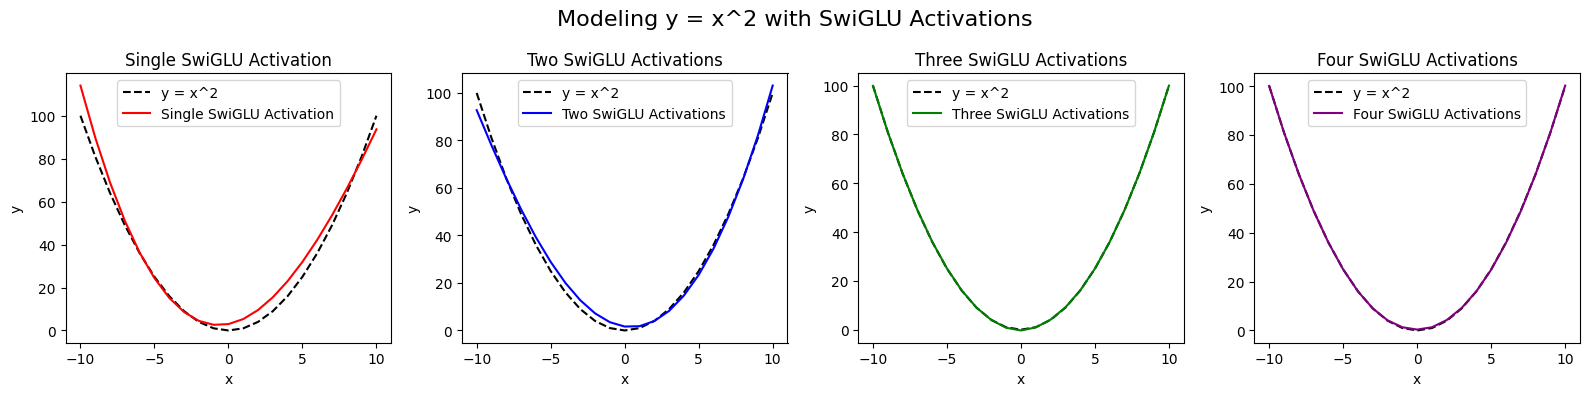

In [40]:
# Appending the ReLU activation function to subplot
outputs_swiglu = [y_hat_swiglu1.detach().numpy(), y_hat_swiglu2.detach().numpy(), y_hat_swiglu3.detach().numpy(), y_hat_swiglu4.detach().numpy()]
titles = ['Single SwiGLU Activation', 'Two SwiGLU Activations', 'Three SwiGLU Activations', 'Four SwiGLU Activations']
colors = ['red', 'blue', 'green', 'purple']

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

# Plot each function on a separate subplot
for ax, output, title, color in zip(axs, outputs_swiglu, titles, colors):
    ax.plot(x, y, label='y = x^2', color='black', linestyle='--')
    ax.plot(x, output, label=title, color=color)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(title)
    ax.legend()

plt.suptitle('Modeling y = x^2 with SwiGLU Activations', fontsize=16)
plt.tight_layout()
plt.show()